In [129]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


### Importing the packages

In [130]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [131]:
os.getcwd()

'C:\\Users\\22000370\\Downloads'

In [132]:
os.chdir(r"C:\Users\22000370\Downloads")

## Importing all the Datasets

### Pfizer Data

In [133]:

pfi=pd.read_csv(r"C:\Users\22000370\Downloads\PFE.csv")

### Tesla Data

In [134]:
tesla=pd.read_excel(r"C:\Users\22000370\Downloads\TSLA2.xlsx")

### Spotify Data

In [135]:
spot=pd.read_csv(r"C:\Users\22000370\Downloads\SPOT.csv")

### Working on Pfizer Data

In [136]:
pfi.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-02-17,31.869070,32.153702,31.812143,31.897533,26.483664,36882306
1,2017-02-21,31.850096,32.068310,31.764706,31.897533,26.483664,25391598
2,2017-02-22,31.850096,32.020874,31.546490,31.869070,26.460030,28676494
3,2017-02-23,31.973434,32.371918,31.859583,32.314991,26.830271,32122863
4,2017-02-24,32.419353,32.590134,32.248577,32.504745,26.987816,26046448


### Shifting of data

Shift is used when we want to get the previous day data in order to compare the data with the current data.

In [226]:
pfi1 = pd.DataFrame(pfi['Open'])
pfi1.head()

,Open
Date,
2017-02-17,31.869070
2017-02-21,31.850096
2017-02-22,31.850096
2017-02-23,31.973434
2017-02-24,32.419353


In [227]:
pfi1.shift(1)

,Open
Date,
2017-02-17,NaN
2017-02-21,31.869070
2017-02-22,31.850096
2017-02-23,31.850096
2017-02-24,31.973434
...,...
2022-02-10,51.639999
2022-02-11,51.040001
2022-02-14,50.330002


In [229]:
pfi1['Prev Day Opening'] = pfi1['Open'].shift(1)
pfi1

,Open,Prev Day Opening
Date,,
2017-02-17,31.869070,NaN
2017-02-21,31.850096,31.869070
2017-02-22,31.850096,31.850096
2017-02-23,31.973434,31.850096
2017-02-24,32.419353,31.973434
...,...,...
2022-02-10,51.040001,51.639999
2022-02-11,50.330002,51.040001
2022-02-14,49.820000,50.330002


The first column shows the NaN value as the first row data has moved to the second row. Thus, this shift gived us the previous day data in this case.

In [137]:
pfi.set_index("Date",inplace=True)
pfi.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-02-17,31.869070,32.153702,31.812143,31.897533,26.483664,36882306
2017-02-21,31.850096,32.068310,31.764706,31.897533,26.483664,25391598
2017-02-22,31.850096,32.020874,31.546490,31.869070,26.460030,28676494
2017-02-23,31.973434,32.371918,31.859583,32.314991,26.830271,32122863
2017-02-24,32.419353,32.590134,32.248577,32.504745,26.987816,26046448


In [10]:
pfi.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [11]:
pfi.shape

(1259, 7)

In [12]:
pfi.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### Checking out the plot representing the closing price

<AxesSubplot:xlabel='Date'>

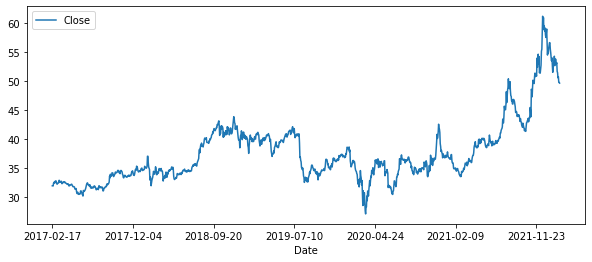

In [138]:
pfi['Close'].plot(legend=True, figsize=(10,4))


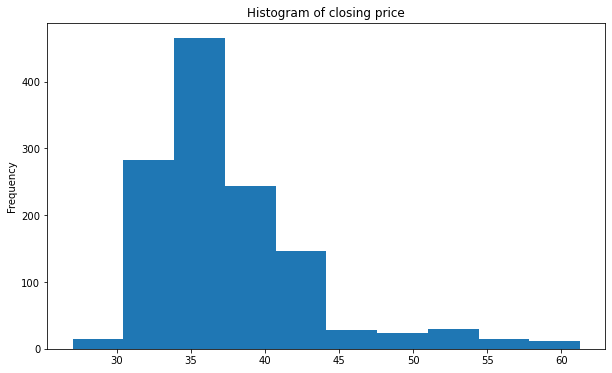

In [139]:
plt.figure(figsize=(10,6))
pfi_close = pfi['Close']
pfi_close.plot(style='k.',kind='hist')
plt.title('Histogram of closing price')
plt.show()

## Testing for stationarity

Null Hypothesis= It is non-stationary

Alternate Hypothesis= It is stationary

<AxesSubplot:ylabel='Density'>

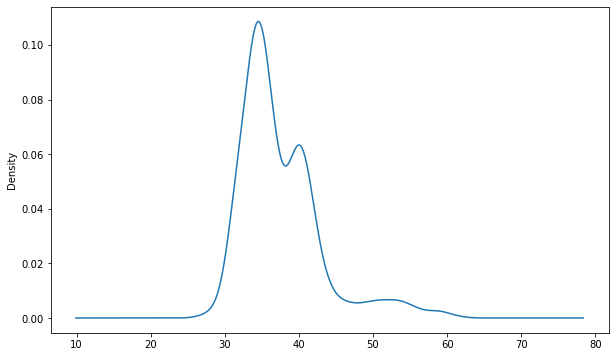

In [140]:
#Distribution of the dataset
pfi_close = pfi['Close']
pfi_close.plot(kind='kde')

In [141]:
pfi.rolling(7).mean().head(9)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-02-17,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-21,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-22,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-23,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-24,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-27,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-28,32.113038,32.343454,31.973434,32.197073,26.732365,2.872764e+07
2017-03-01,32.205205,32.430198,32.043915,32.305504,26.822392,2.832087e+07
2017-03-02,32.325833,32.558959,32.171321,32.426133,26.922547,2.854393e+07


Now since a lot of noise was there in the earlier graph of the closing price, so we took the moving average for a window of a week.
We mentioned rolling window as 7 as we want the data of a week.

The 7th row's values as you can see, are the average of the first 6 rows.

In [ ]:
#Now taking this rolled data, we plot the average of a window of a month.

<AxesSubplot:xlabel='Date'>

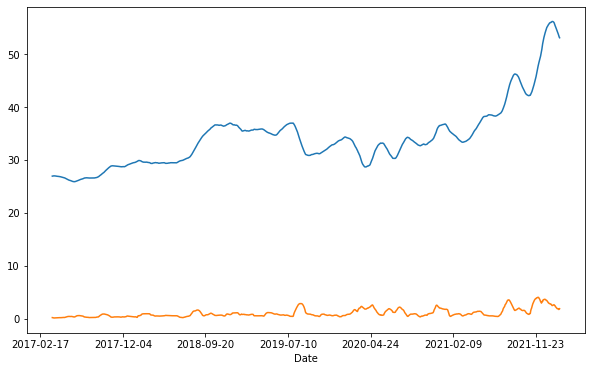

In [142]:
pfi.rolling(30).mean()["Adj Close"].plot()
pfi.rolling(30).std()["Adj Close"].plot()

As compared to the earlier plot, representing the closing price, this plot has much less noise and thus this trend of the closing date
can be seen and understood in  a better way.

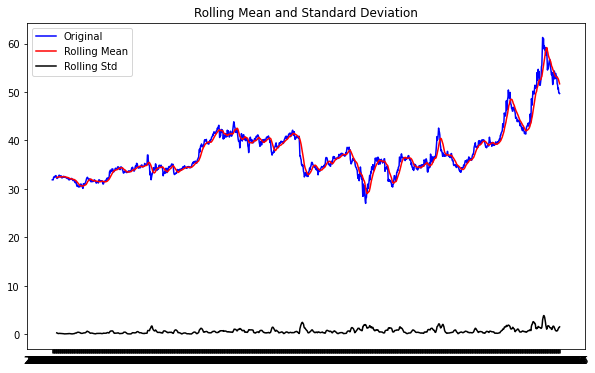

Results of dickey fuller test
Test Statistics                  -1.619321
p-value                           0.473085
No. of lags used                 23.000000
Number of observations used    1235.000000
critical value (1%)              -3.435656
critical value (5%)              -2.863883
critical value (10%)             -2.568018
dtype: float64


In [143]:
#Test for stationarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(pfi_close)

### According to the Dickey Fuller Test, we can see that the p value is greater than 0.05 so therefore, we can't reject the null hypothesis therefore the series is not stationary.

Seasonality-Repeating cycles occuring regularly over time.
Trend-Shows a slope which can be either increasing or decreasing and it occurs for a short period of time

Time series stationarity means that each point is independent over the other, without any auto-correlation and since in our data, we saw that the data is not stationary so we need to make it stationary.
They do not show any trends, stationarity etc.

So now in order to remove non-stationarity from our dataset we need to separate trend and seasonality.


<Figure size 720x432 with 0 Axes>

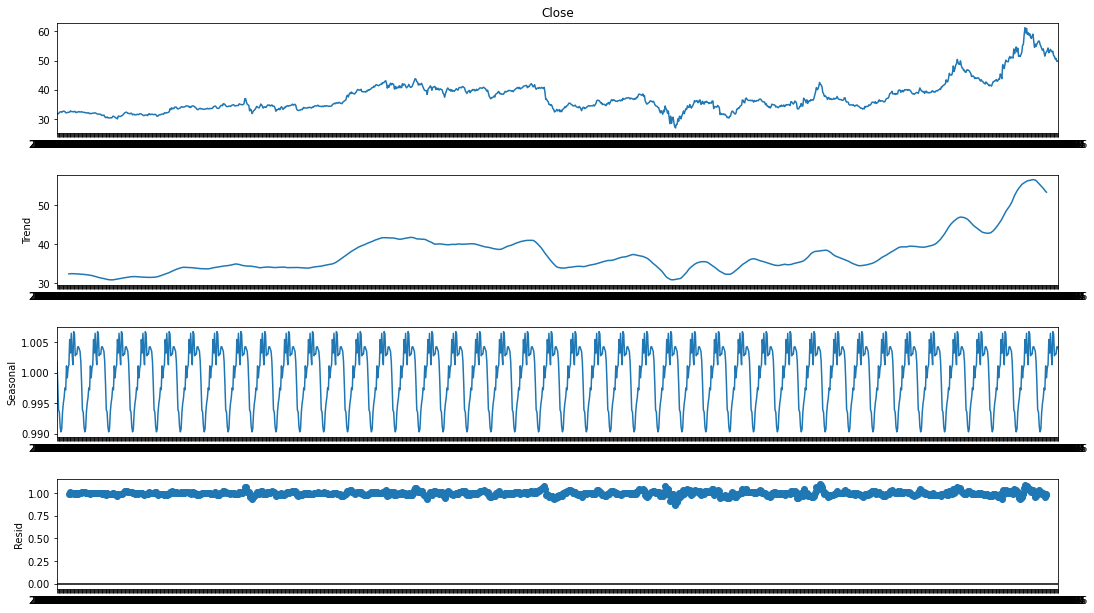

In [144]:
soln = seasonal_decompose(pfi_close, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = soln.plot()  
fig.set_size_inches(16, 9)

We start by taking a log of the series to reduce the magnitude of the values and reduce the rising trend in the series. Then after getting the log of the series, we find the rolling average of the series. A rolling average is calculated by taking input for the past 12 months and giving a mean consumption value at every point further ahead in series.

### Train test Split

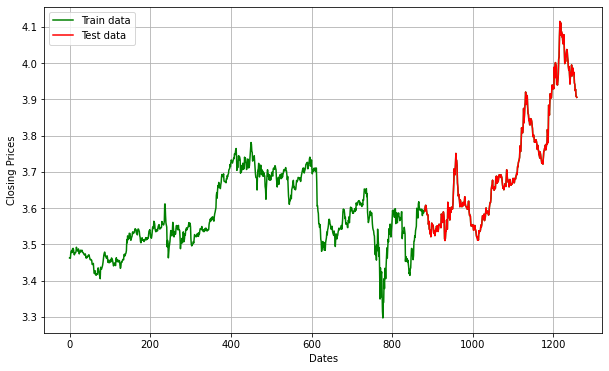

In [145]:
#split data into train and training set
training_data, testing_data = pfi_log[3:int(len(pfi_log)*0.7)], pfi_log[int(len(pfi_log)*0.7):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(pfi_log, 'green', label='Train data')
plt.plot(testing_data, 'red', label='Test data')
plt.legend()

Auto ARIMA Model is used in order to determine the values of p,q,d which is used in turn to determine autoregressive values(dependency of the required window of old values on the current value),d is 
no.of non-seasonal differences needed for stationarity and d is the lag or degree of differencing.

Using Auto Arima provides us an automatic way to get the p,d , q values ina  hassle free manner.

In [146]:
model_autoARIMA = auto_arima(training_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-4930.655, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-4940.129, Time=0.24 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-4939.028, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-4932.578, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-4939.574, Time=0.20 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-4938.869, Time=0.28 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-4938.012, Time=0.93 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-4942.034, Time=0.19 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-4941.485, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-4940.776, Time=0.26 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-4940.991, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-4939.635, Time=0.46 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 3.127 seconds
                               SARIMAX Results                              

So the Auto ARIMA model provided the value of p,d, and q as 1,1 and 0 respectively.

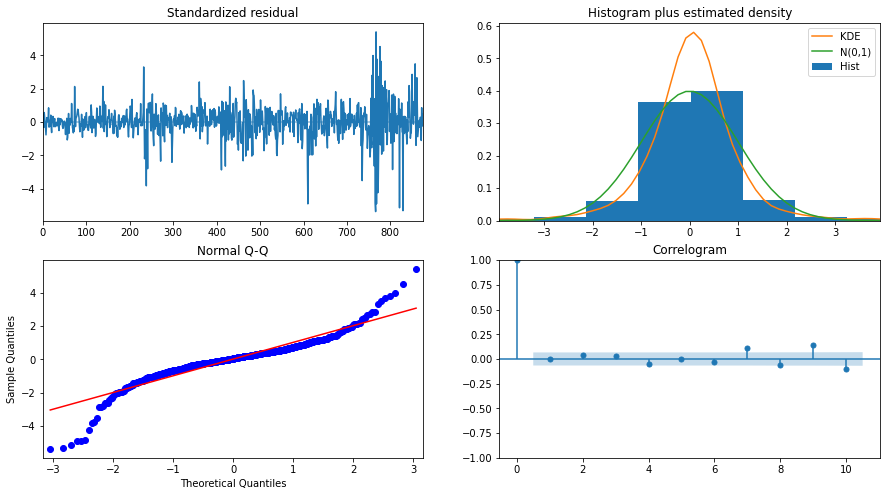

In [147]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

Graph2- Normal distribution having a mean of 0

Graph3- More the red line gets aligned with all the dots, less the chances of the data to be skewed.

Graph4- No auto-correlation is seen

In [148]:
model = ARIMA(training_data, order=(1, 1, 0))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  877
Model:                 ARIMA(1, 1, 0)   Log Likelihood                2473.065
Method:                       css-mle   S.D. of innovations              0.014
Date:                Fri, 25 Mar 2022   AIC                          -4940.129
Time:                        23:45:48   BIC                          -4925.800
Sample:                             1   HQIC                         -4934.649
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0001      0.000      0.308      0.758      -0.001       0.001
ar.L1.D.Close    -0.1140      0.034     -3.399      0.001      -0.180      -0.048
                                    Root

In [149]:
training_data.shape

(878,)

In [150]:
testing_data.shape

(378,)

### Forecasting

In [151]:
fc, se, conf = fitted.forecast(378, alpha=0.05)  # 95% confidence

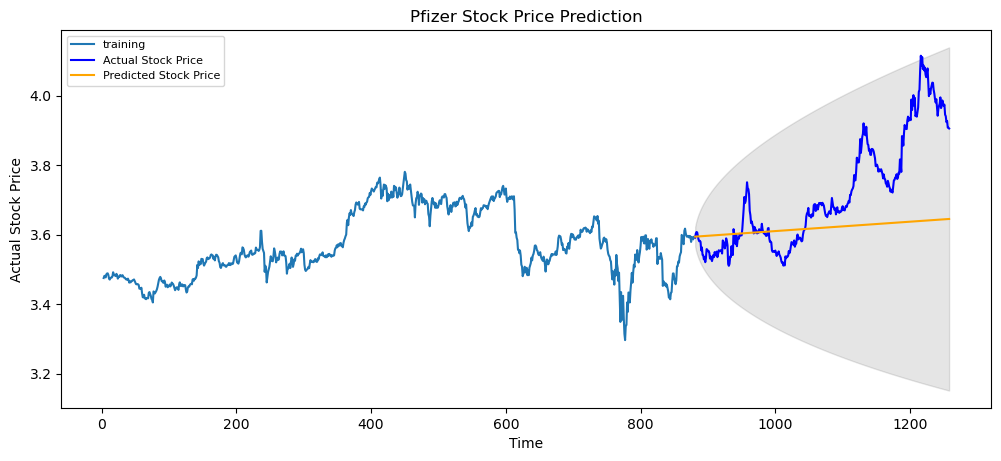

In [152]:
fc_series = pd.Series(fc, index=testing_data.index)
lower_series = pd.Series(conf[:, 0], index=testing_data.index)
upper_series = pd.Series(conf[:, 1], index=testing_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(training_data, label='training')
plt.plot(testing_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Pfizer Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [154]:
# report performance
mse = mean_squared_error(testing_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(testing_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(testing_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - testing_data)/np.abs(testing_data))
print('MAPE: '+str(mape))


MSE: 0.03017023953477013
MAE: 0.12456554892355395
RMSE: 0.1736958247476609
MAPE: 0.03233149277894828


## Tesla

In [155]:
tesla=pd.read_csv(r"C:\Users\22000370\Downloads\TSLA2-C.csv")

In [156]:
tesla.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,17-02-2017,53.160000,54.577999,52.830002,54.445999,54.445999,31285500
1,21-02-2017,55.090000,56.279999,54.801998,55.478001,55.478001,28383500
2,22-02-2017,56.062000,56.689999,54.520000,54.702000,54.702000,43775000
3,23-02-2017,52.799999,52.931999,51.112000,51.198002,51.198002,74576000
4,24-02-2017,50.532001,51.650002,50.040001,51.400002,51.400002,40858000
5,27-02-2017,49.633999,49.672001,48.402000,49.245998,49.245998,57304000
6,28-02-2017,48.838001,50.200001,48.779999,49.998001,49.998001,30390500
7,01-03-2017,50.835999,50.970001,49.821999,50.004002,50.004002,24047500
8,02-03-2017,49.942001,50.655998,49.653999,50.096001,50.096001,16759000
9,03-03-2017,50.147999,50.380001,49.799999,50.313999,50.313999,14597000


In [157]:
tesla.set_index("Date",inplace=True)
tesla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
17-02-2017,53.160000,54.577999,52.830002,54.445999,54.445999,31285500
21-02-2017,55.090000,56.279999,54.801998,55.478001,55.478001,28383500
22-02-2017,56.062000,56.689999,54.520000,54.702000,54.702000,43775000
23-02-2017,52.799999,52.931999,51.112000,51.198002,51.198002,74576000
24-02-2017,50.532001,51.650002,50.040001,51.400002,51.400002,40858000


In [158]:
tesla.shape

(1259, 6)

In [159]:
tesla.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [160]:
tesla.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [161]:
#tesla.index = pd.to_datetime(tesla.index)

In [162]:
#tesla.tshift(freq="M").head()

### The main difference between the closing price and the adjusted closing price is that the closing price refers to the last price of the stock before the market closes, while the adjusted closing price is the type of price which gets affected by anything that might affect the stock price after the market closes. Therefore we use the adjusted closing price in this case in order to understand the market situation of Tesla.

<AxesSubplot:xlabel='Date'>

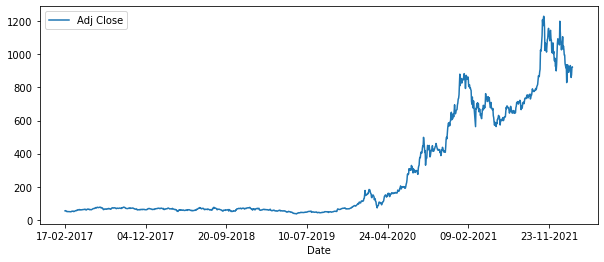

In [163]:
tesla['Adj Close'].plot(legend=True, figsize=(10,4))

<AxesSubplot:ylabel='Density'>

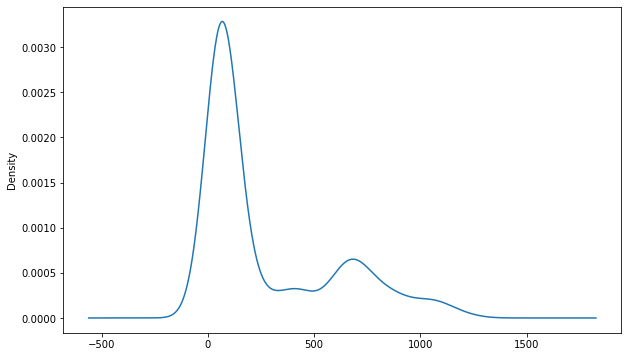

In [164]:
#Distribution of the dataset
tesla_Adj_close = tesla['Adj Close']
tesla_Adj_close.plot(kind='kde')


## Checking for stationarity(Augmented Dickey Fuller Test)

Null Hypothesis= It is non-stationary

Alternate Hypothesis= It is stationary

In [165]:
tesla.rolling(7).mean().head(9)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
17-02-2017,NaN,NaN,NaN,NaN,NaN,NaN
21-02-2017,NaN,NaN,NaN,NaN,NaN,NaN
22-02-2017,NaN,NaN,NaN,NaN,NaN,NaN
23-02-2017,NaN,NaN,NaN,NaN,NaN,NaN
24-02-2017,NaN,NaN,NaN,NaN,NaN,NaN
27-02-2017,NaN,NaN,NaN,NaN,NaN,NaN
28-02-2017,52.302286,53.143143,51.498000,52.352572,52.352572,4.379607e+07
01-03-2017,51.970286,52.627715,51.068285,51.718001,51.718001,4.276207e+07
02-03-2017,51.234857,51.824286,50.332857,50.949144,50.949144,4.110143e+07


<AxesSubplot:xlabel='Date'>

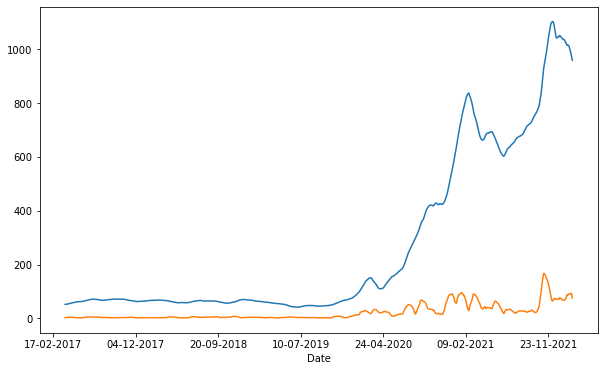

In [166]:
tesla.rolling(30).mean()["Adj Close"].plot()
tesla.rolling(30).std()["Adj Close"].plot()

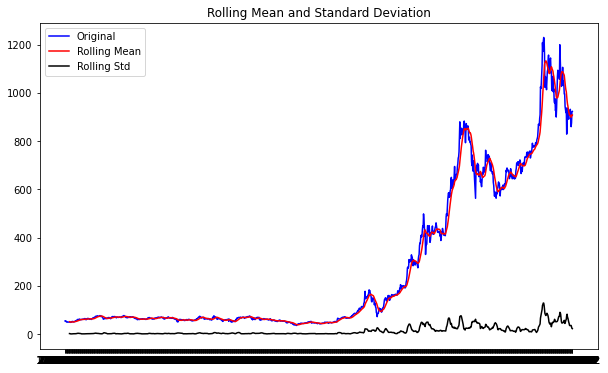

Results of dickey fuller test
Test Statistics                   0.201847
p-value                           0.972365
No. of lags used                 14.000000
Number of observations used    1244.000000
critical value (1%)              -3.435618
critical value (5%)              -2.863866
critical value (10%)             -2.568008
dtype: float64


In [167]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(tesla_Adj_close)

### Since the p-value is more than 0.05 so we can't reject the null hypothesis and thus the series is non-stationary. Here, in the graph we can see that our series is increasing as well as our standard deviation which is showing fluctuations also pointing to the non-stationary nature of the series.

### Separate trend and seasonality

<Figure size 720x432 with 0 Axes>

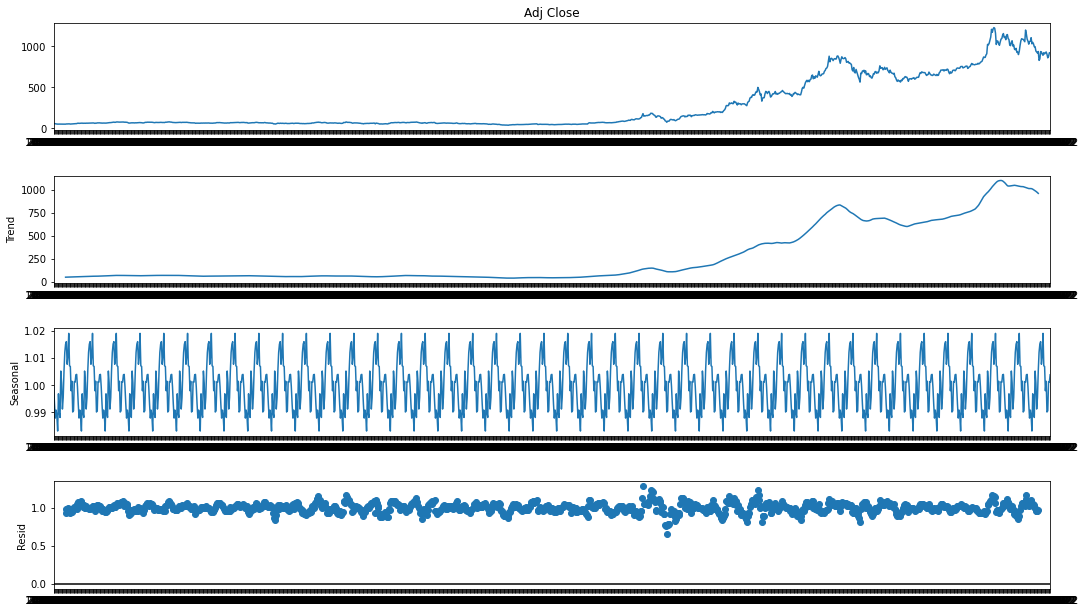

In [168]:
soln = seasonal_decompose(tesla_Adj_close, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = soln.plot()  
fig.set_size_inches(16, 9)

No handles with labels found to put in legend.


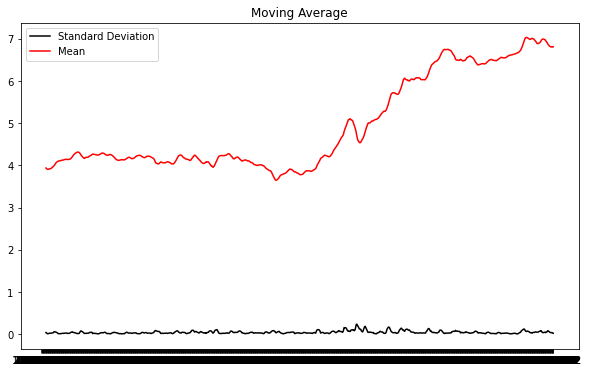

In [169]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
tesla_log = np.log(tesla['Adj Close'])
moving_avg = tesla_log.rolling(12).mean()
std_dev = tesla_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

### Moving average is used to smoothen the short term fluctuations and also removes the noise present in the data. It helps in forecasting the future values based on the average values present in the historical data.

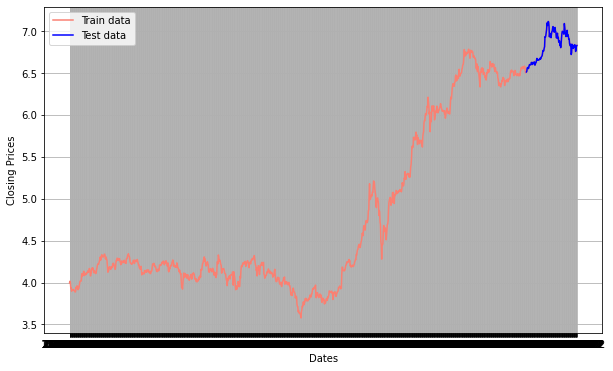

In [170]:
#split data into train and training set
train_data, test_data = tesla_log[3:int(len(tesla_log)*0.9)], tesla_log[int(len(tesla_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(tesla_log, 'salmon', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [171]:
model_autoARIMA1 = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA1.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-4134.681, Time=0.21 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-4133.062, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-4133.034, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-4132.693, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-4130.811, Time=0.44 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.086 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1130
Model:               SARIMAX(0, 1, 0)   Log Likelihood                2069.341
Date:                Fri, 25 Mar 2022   AIC                          -4134.681
Time:                        23:47:20   BIC                          -4124.623
Sample:                             0   HQIC                         -4130.881
                               - 1130                                  

So the Auto ARIMA model provided the value of p,d, and q as 0,1 and 0 respectively.

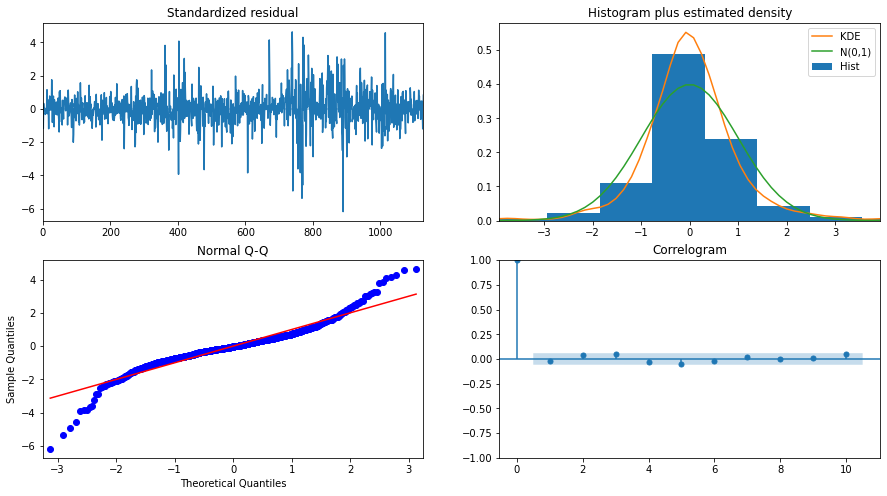

In [172]:
model_autoARIMA1.plot_diagnostics(figsize=(15,8))
plt.show()

Graph2- Normal distribution having a mean of 0

Graph3- More the red line gets aligned with all the dots, less the chances of the data to be skewed.

Graph4- No auto-correlation is seen

In [173]:
model = ARIMA(train_data, order=(0, 1, 0))
fitted = model.fit(disp=-1)
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Adj Close   No. Observations:                 1129
Model:                 ARIMA(0, 1, 0)   Log Likelihood                2069.341
Method:                           css   S.D. of innovations              0.039
Date:                Fri, 25 Mar 2022   AIC                          -4134.681
Time:                        23:47:20   BIC                          -4124.623
Sample:                             1   HQIC                         -4130.881
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0023      0.001      1.999      0.046    4.49e-05       0.005


In [174]:
train_data.shape

(1130,)

In [175]:
test_data.shape

(126,)

### Forecasting

In [176]:
fc, se, conf = fitted.forecast(126, alpha=0.05)  # 95% confidence

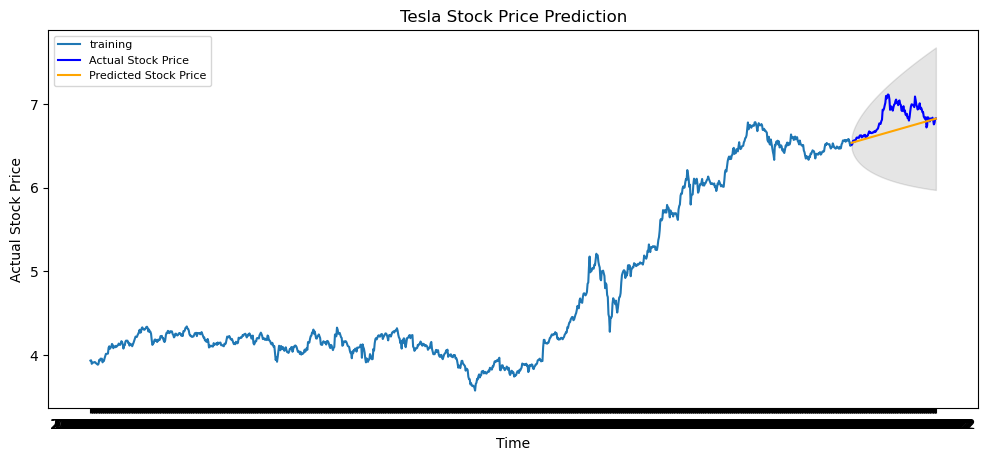

In [177]:
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [178]:
# report performance
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

MSE: 0.037969988146958775
MAE: 0.14971840785769513
RMSE: 0.19485889291217576
MAPE: 0.021566320071987936


## Spotify 

In [205]:
spot=pd.read_csv(r"C:\Users\22000370\Downloads\SPOT.csv")

In [206]:
spot.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-04-03,165.899994,169.000000,148.259995,149.009995,149.009995,30526500
1,2018-04-04,140.000000,148.929993,135.509995,144.220001,144.220001,11702900
2,2018-04-05,149.229996,152.410004,141.250000,143.990005,143.990005,7372800
3,2018-04-06,146.070007,148.729996,144.669998,147.919998,147.919998,4228100
4,2018-04-09,149.500000,151.000000,148.589996,150.000000,150.000000,2051400


In [207]:
spot.set_index("Date",inplace=True)
spot.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-04-03,165.899994,169.000000,148.259995,149.009995,149.009995,30526500
2018-04-04,140.000000,148.929993,135.509995,144.220001,144.220001,11702900
2018-04-05,149.229996,152.410004,141.250000,143.990005,143.990005,7372800
2018-04-06,146.070007,148.729996,144.669998,147.919998,147.919998,4228100
2018-04-09,149.500000,151.000000,148.589996,150.000000,150.000000,2051400


In [208]:
spot.shape

(978, 6)

In [209]:
spot.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [210]:
spot.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### Checking out the Adj.Close column

<AxesSubplot:xlabel='Date'>

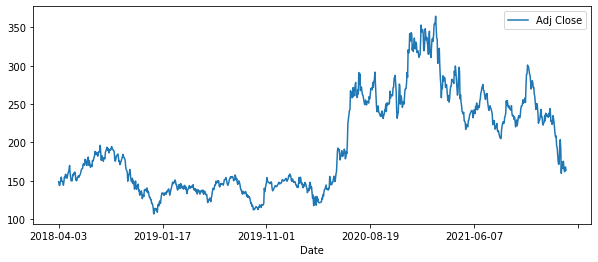

In [211]:
spot['Adj Close'].plot(legend=True, figsize=(10,4))

<AxesSubplot:ylabel='Density'>

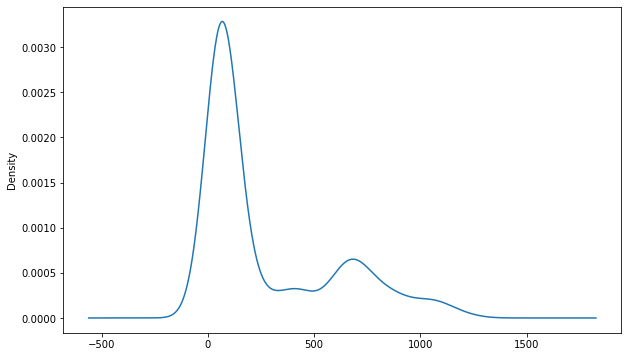

In [212]:
#Distribution of the dataset
spot_Adj_close = tesla['Adj Close']
spot_Adj_close.plot(kind='kde')

### Checking for Stationarity

Null Hypothesis= It is non-stationary

Alternate Hypothesis= It is stationary

In [213]:
spot.rolling(7).mean().head(9)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-04-03,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-04,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-05,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-06,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-09,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-10,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-11,150.957142,154.422856,145.273283,148.515714,148.515714,8.676529e+06
2018-04-12,148.721429,151.851427,145.328997,148.528573,148.528573,4.511586e+06
2018-04-13,150.121429,152.064285,147.120427,149.211430,149.211430,3.069471e+06


<AxesSubplot:xlabel='Date'>

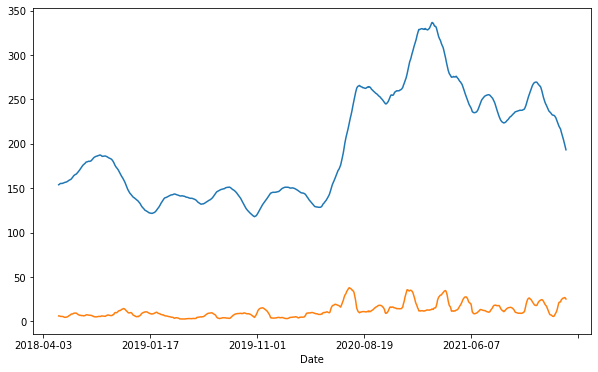

In [214]:
spot.rolling(30).mean()["Adj Close"].plot()
spot.rolling(30).std()["Adj Close"].plot()

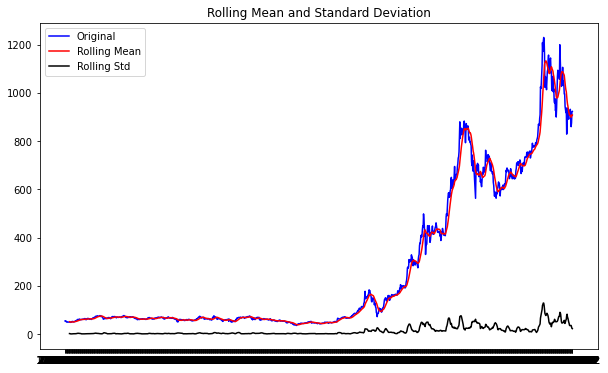

Results of dickey fuller test
Test Statistics                   0.201847
p-value                           0.972365
No. of lags used                 14.000000
Number of observations used    1244.000000
critical value (1%)              -3.435618
critical value (5%)              -2.863866
critical value (10%)             -2.568008
dtype: float64


In [215]:
#Test for stationarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(spot_Adj_close)

### Since the p-value is more than 0.05 so we can't reject the null hypothesis and thus the series is non-stationary. Here, in the graph we can see that our series is increasing as well as our standard deviation which is showing fluctuations also pointing to the non-stationary nature of the series.

### Separating trend and seasonality 

<Figure size 720x432 with 0 Axes>

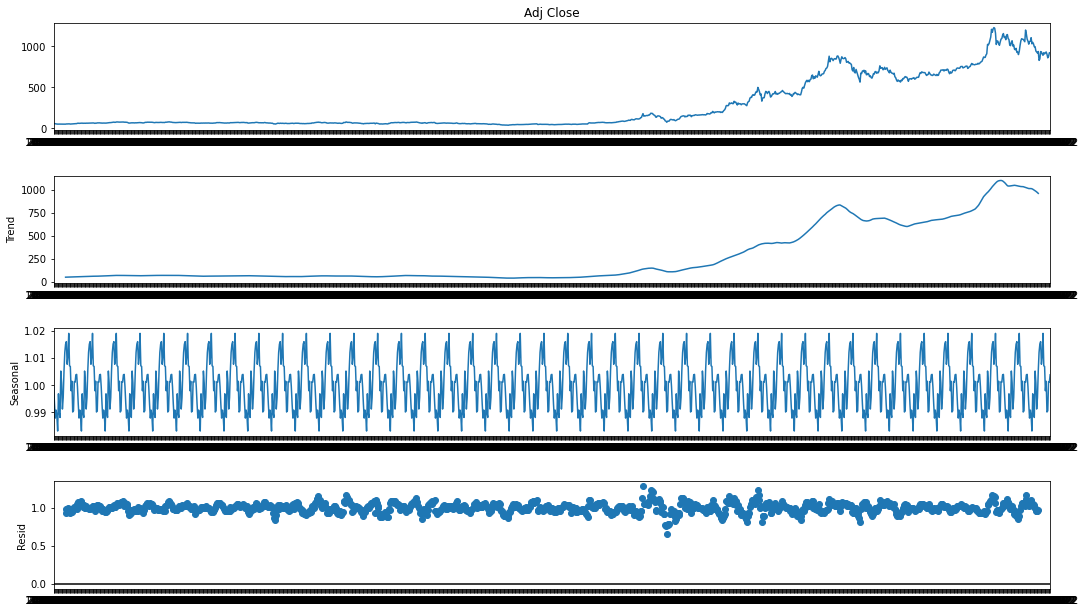

In [216]:
soln = seasonal_decompose(spot_Adj_close, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = soln.plot()  
fig.set_size_inches(16, 9)

No handles with labels found to put in legend.


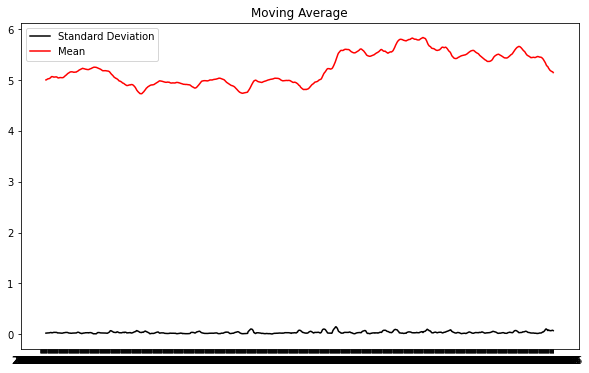

In [217]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
spot_log = np.log(spot['Adj Close'])
moving_avg = spot_log.rolling(12).mean()
std_dev = spot_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

### Moving average is used to smoothen the short term fluctuations and also removes the noise present in the data. It helps in forecasting the future values based on the average values present in the historical data.

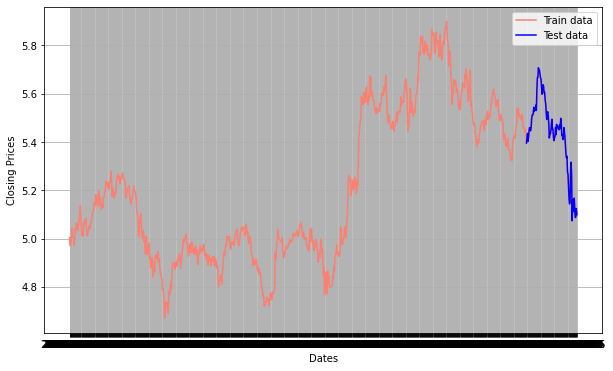

In [218]:
#split data into train and training set
train1_data, test1_data = spot_log[3:int(len(spot_log)*0.9)], spot_log[int(len(spot_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(spot_log, 'salmon', label='Train data')
plt.plot(test1_data, 'blue', label='Test data')
plt.legend()

In [219]:
model_autoARIMA2 = auto_arima(train1_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA2.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-3728.846, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-3727.595, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-3727.574, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-3730.591, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-3725.672, Time=0.34 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.827 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  877
Model:               SARIMAX(0, 1, 0)   Log Likelihood                1866.295
Date:                Sat, 26 Mar 2022   AIC                          -3730.591
Time:                        00:20:09   BIC                          -3725.815
Sample:                             0   HQIC                         -3728.764
                                - 877                                  

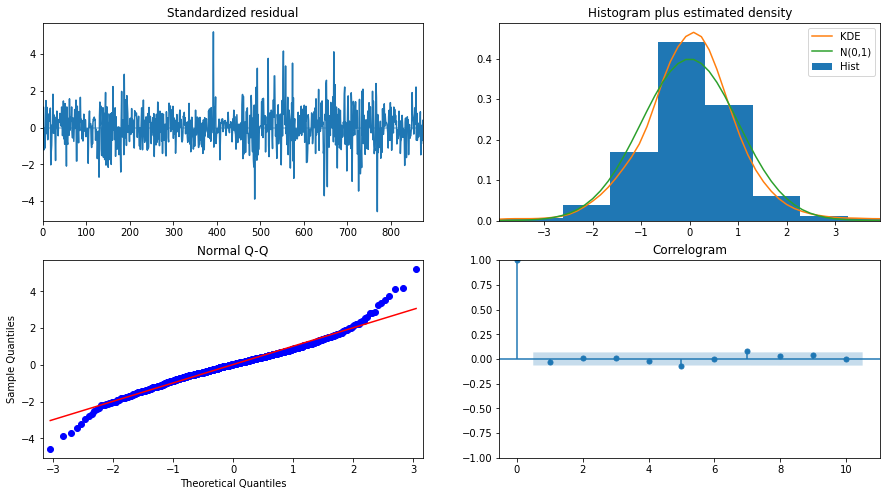

In [220]:
model_autoARIMA2.plot_diagnostics(figsize=(15,8))
plt.show()

Graph2- Normal distribution having a mean of 0

Graph3- More the red line gets aligned with all the dots, less the chances of the data to be skewed.

Graph4- No auto-correlation is seen

In [221]:
train1_data.shape

(877,)

In [222]:
test1_data.shape

(98,)

### Forecasting

In [223]:
fc, se, conf = fitted.forecast(98, alpha=0.05)  # 95% confidence

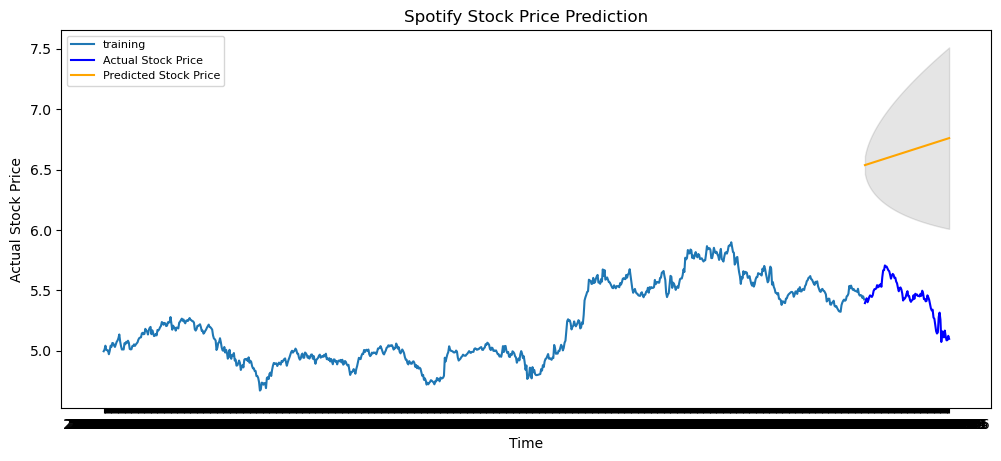

In [224]:
fc_series = pd.Series(fc, index=test1_data.index)
lower_series = pd.Series(conf[:, 0], index=test1_data.index)
upper_series = pd.Series(conf[:, 1], index=test1_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train1_data, label='training')
plt.plot(test1_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Spotify Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [225]:
# report performance
mse = mean_squared_error(test1_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test1_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test1_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test1_data)/np.abs(test1_data))
print('MAPE: '+str(mape))

MSE: 1.5175221867033941
MAE: 1.2140919639557302
RMSE: 1.2318775047476895
MAPE: 0.22466728242612238
